**PCA (Principal Component Analysis)**

IRIS veri seti 3 IRIS bitki türüne (iris setosa, iris virginica ve iris versicolor) ait, her türden 50 örnek olmak üzere toplam 150 örnek sayısına sahip bir veri setidir.

Her bir örnek için 4 özellik tanımlanmıştır: sepal length, sepal width, petal length ve petal width.

Bitki tür ismi bağımlı(dependent) değişken, bitkilerin ölçülen 4 temel özelliği ise bağımsız(independent) değişkenleri ifade eder.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
# bagimli degiskenlerin kimisi 0-100 kimisi 5-10 arasında oldugu icin ve bunların hepsinin aynı scale de olmasi gerektigi icin
# standard scaler kullanmamız gerekiyor yoksa pca isini yapamiyor.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
url="pca_iris.data"
# dataframe icine yukle
df=pd.read_csv(url, names=["sepal length", "sepal width", "petal length", "petal width", "target"])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# feature degerlerini ve target degerini birbirinden ayıralım
# feature degerleri x dataframe olsun
features=["sepal length", "sepal width", "petal length", "petal width"]
x=df[features]

# target y dataframe olsun
target=["target"]
y=df[target]

In [5]:
x

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


Değerleri scale etmemiz gerekiyor.

Çünkü her bir feature çok farklı boyutlarda ve bunların yapay zeka tarafından eşit ağırlıklarda dengelenmesi gerekiyor.

Bu amaçla Standard Scaler kullanarak tüm verilerin mean=0 ve variance=1 olacak şekilde değiştiriyoruz.

In [7]:
# Standardizing the features and checking is it working...
x=StandardScaler().fit_transform(x)
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

**PCA Projection from 4-D to 2-D**

Orjinal veriler 4 boyuta sahip: sepal length, sepal width, petal length, petal width

Biz PCA yaparak bunları 2 boyuta indirgeyeceğiz ancak şu var ki, PCA indirgeme sonucunda elde edeceğimiz 2 boyut herhangi bir anlam ifade etmeyen başlıklara sahip olacak. Yani 4 feature'dan 2 tanesini basit bir şekilde atmayacağız...

In [8]:
pca=PCA(n_components=2) # 2 boyuta indirgeyeceğimiz icin...
principalComponents=pca.fit_transform(x) # parametre olarak scale edilmis feature'lari veriyorum...
# olusan principalComponents'i dataframe'e cevirelim...
principalDF=pd.DataFrame(data=principalComponents, columns=["Principal Component 1", "Principal Component 2"])

In [9]:
principalDF

,Principal Component 1,Principal Component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


Son olarak target sütununu da PCA dataframe'imizin sonuna ekleyelim...

In [10]:
final_df=pd.concat([principalDF, df[target]],axis=1)

In [11]:
final_df.head()

,Principal Component 1,Principal Component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


Son olarak Final DataFrame'i görselleştirip inceleyelim.

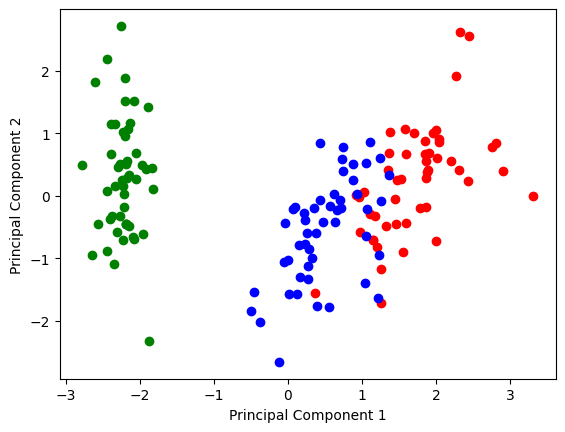

In [13]:
dfsetosa=final_df[df.target=="Iris-setosa"]
dfvirginica=final_df[df.target=="Iris-virginica"]
dfversicolor=final_df[df.target=="Iris-versicolor"]

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.scatter(dfsetosa["Principal Component 1"],dfsetosa["Principal Component 2"], color="green")
plt.scatter(dfvirginica["Principal Component 1"],dfvirginica["Principal Component 2"], color="red")
plt.scatter(dfversicolor["Principal Component 1"],dfversicolor["Principal Component 2"], color="blue")

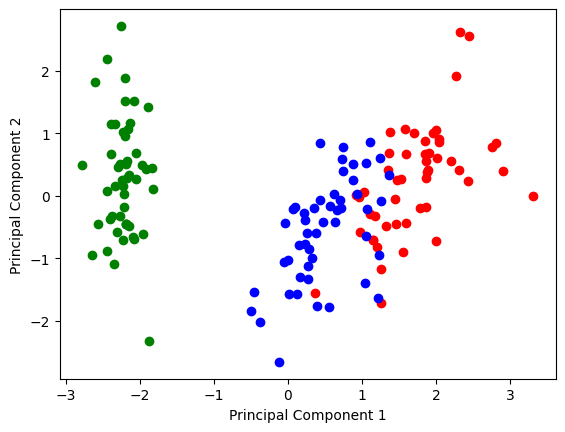

In [20]:
targets=["Iris-setosa", "Iris-virginica", "Iris-versicolor"]
colors=["g", "r", "b"]

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

for target, col in zip(targets,colors):
  dftemp=final_df[df.target==target]
  plt.scatter(dftemp["Principal Component 1"], dftemp["Principal Component 2"], color=col)

In [22]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [23]:
pca.explained_variance_ratio_.sum()

0.9580097536148197

Veri setimizi neredeyse 96% korumuşum.
